# Random Forests

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
%matplotlib inline


## Load data and preview data

In [2]:
# Loading data
crop_predictor_df = pd.read_csv("../Resources/crop_recommendation_family_clean.csv")
crop_predictor_df.head()

N   P   K  temperature  humidity    ph  rainfall crop_name  kingdom  \
0  90  42  43        20.88     82.00  6.50    202.94      rice  plantae   
1  85  58  41        21.77     80.32  7.04    226.66      rice  plantae   
2  60  55  44        23.00     82.32  7.84    263.96      rice  plantae   
3  74  35  40        26.49     80.16  6.98    242.86      rice  plantae   
4  78  42  42        20.13     81.60  7.63    262.72      rice  plantae   

    order   family  genus botanical_name  
0  poales  poaceae  oryza   oryza sativa  
1  poales  poaceae  oryza   oryza sativa  
2  poales  poaceae  oryza   oryza sativa  
3  poales  poaceae  oryza   oryza sativa  
4  poales  poaceae  oryza   oryza sativa

In [3]:
# Drop depentent variables
crop_predictor_df.drop(["kingdom","botanical_name", "family", "genus", "order"], axis=1, inplace=True)

In [4]:
# Examine the data types of the columns in the dataset
crop_predictor_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop_name       object
dtype: object

In [5]:
# Extract the crop names from the crop_predictor_df
crop_predictor_df['crop_name'].unique()

array(['rice', 'maize', 'chickpea', 'kidney_bean', 'pigeon_pea',
       'moth_bean', 'mung_bean', 'urad_bean', 'lentil', 'pomegranate',
       'banana', 'mango', 'grape', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
# Generate a value count for each crop in the dataset
crop_predictor_df['crop_name'].value_counts()

crop_name
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grape          100
mango          100
banana         100
pomegranate    100
lentil         100
urad_bean      100
mung_bean      100
moth_bean      100
pigeon_pea     100
kidney_bean    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
# Define features set to be used as X value
X = crop_predictor_df.copy()
X.drop(["crop_name"], axis=1, inplace=True)
X.head(10)

N   P   K  temperature  humidity    ph  rainfall
0  90  42  43        20.88     82.00  6.50    202.94
1  85  58  41        21.77     80.32  7.04    226.66
2  60  55  44        23.00     82.32  7.84    263.96
3  74  35  40        26.49     80.16  6.98    242.86
4  78  42  42        20.13     81.60  7.63    262.72
5  69  37  42        23.06     83.37  7.07    251.05
6  69  55  38        22.71     82.64  5.70    271.32
7  94  53  40        20.28     82.89  5.72    241.97
8  89  54  38        24.52     83.54  6.69    230.45
9  68  58  38        23.22     83.03  6.34    221.21

In [8]:
# Define target vector
y = crop_predictor_df["crop_name"].ravel()
y[:-1]

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

In [9]:
# Splitting into Train and Test datasets and viewing the shape of the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [10]:
# Veiw the shape of the output dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1760, 7)
(1760,)
(440, 7)
(440,)


In [11]:
# Scalar removed as accuracy was less than 5% with scalar
# scaler = StandardScaler()
# X_scaler = scaler.fit(X_train)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [12]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=747, max_features=2, criterion = 'log_loss', random_state=44,  min_samples_leaf=1)
# rf_model = RandomForestClassifier()


In [13]:
# Fitting the model
rf_model_ = rf_model.fit(X_train, y_train)

In [14]:
# Check prediction accuracy of random forest model with basic features and scaled data
y_pred = rf_model.predict(X_test)

In [15]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9977272727272727


In [16]:
for i in range(7):
    tree = rf_model.estimators_[i]
    crops_data = export_graphviz(tree,
                                 feature_names=X_train.columns,
                               class_names=y_train,
                               rounded=True,
                               filled=True,
                               precision=2,
                               proportion=True)



In [19]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=900'])
from IPython.display import Image
Image(filename = 'tree.png')

In [20]:
y_pred = rf_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [21]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['rice', 'maize', 'chickpea', 'kidney_bean', 'pigeon_pea',
       'moth_bean', 'mung_bean', 'urad_bean', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'], 
                     columns = ['rice', 'maize', 'chickpea', 'kidney_bean', 'pigeon_pea',
       'moth_bean', 'mung_bean', 'urad_bean', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])

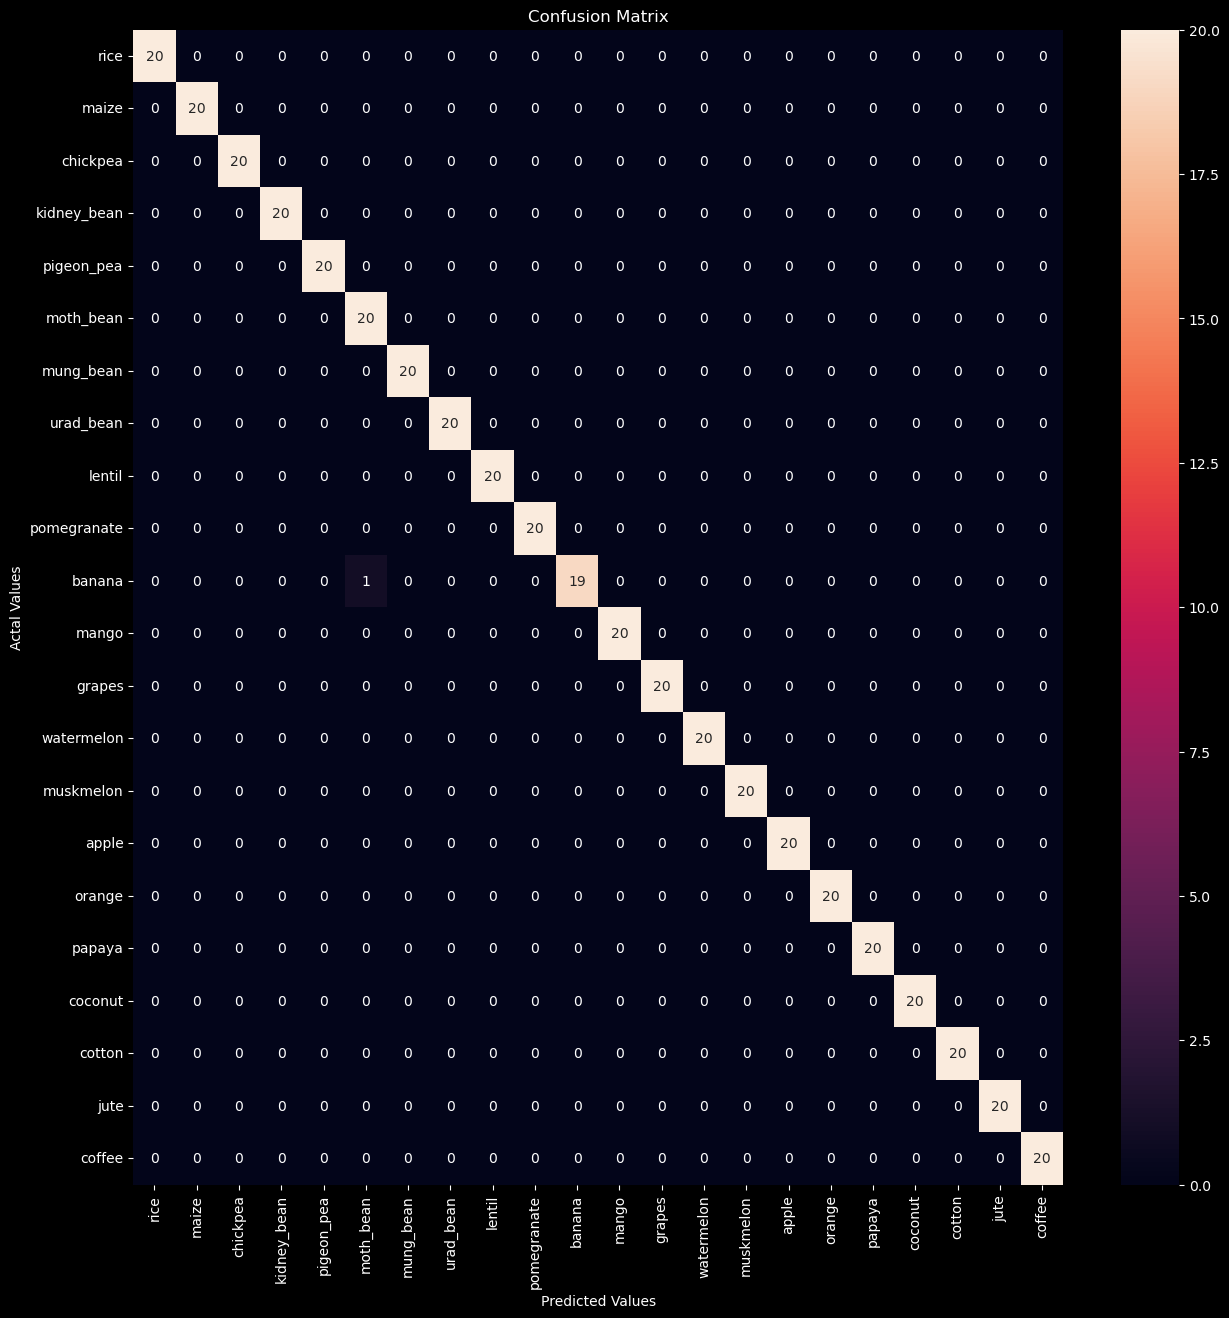

In [22]:
#Plotting the confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [23]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
})

imp_sort = imp_df.sort_values(by="Importance", ascending=False)
imp_sort

Feature  Importance
4     humidity    0.224984
2            K    0.194768
6     rainfall    0.189290
0            N    0.148103
1            P    0.144310
3  temperature    0.065042
5           ph    0.033504

<BarContainer object of 7 artists>

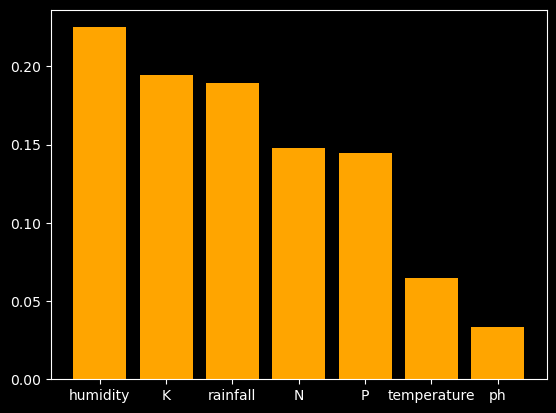

In [24]:

plt.bar('Feature','Importance', data=imp_sort, color='orange')

Tuning

In [25]:
param_dist = {'n_estimators': randint(50,800),
              'max_depth': randint(1,20)}
rf_model_best = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf_model_best, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=5)


In [26]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026CD668E410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026CD66AC190>})

In [27]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 554}
